In [2]:
import json
import os
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import torch

/home/parinayok/.pyenv/versions/miniconda3-latest/envs/food.com_net_test/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
path='results/vlpcook/base.json'
with open(path) as f:
    im2recipe_dict = json.load(f)

['recipes-6_00009735', 'recipes-3_00010798', 'recipes-9_00010836', 'recipes-4_00003609', 'recipes-6_00006346']


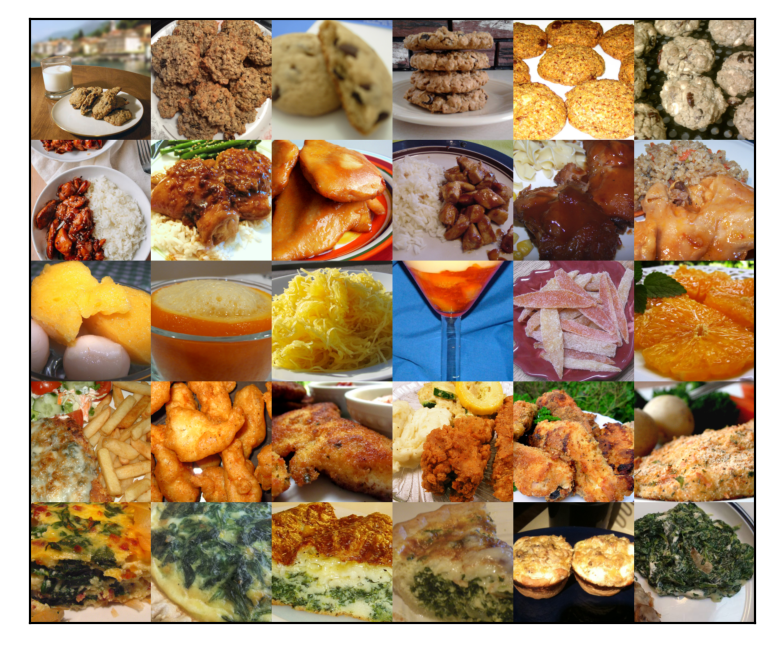

In [13]:
from random import choice, choices


img_dir = '/srv/datasets2/recipe1m+/raw_htmls'
scale_size = 256
crop_size = 224
transform = transforms.Compose([
            transforms.Resize(scale_size),
            # transforms.CenterCrop(crop_size),
            transforms.ToTensor(),
        ])
def get_img_from_id(recipe_id: str):
    site_map = recipe_id.split('_')[0]
    file_name = 'recipe-' + recipe_id.split('_')[1] + '.jpg'
    img_path = os.path.join(img_dir,site_map,file_name)
    img = Image.open(img_path).convert('RGB')
    img = transform(img)
    return img

# rand_recipe_ids = choices(list(im2recipe_dict.keys()),k=5)
plt.figure(dpi=200)
all_imgs = []
for recipe_id in rand_recipe_ids:
    imgs = []
    first_img = get_img_from_id(recipe_id)
    imgs.append(first_img)
    results = im2recipe_dict[recipe_id]
    for result in results[:5]:
        img = get_img_from_id(result)
        imgs.append(img)
    all_results_img = torch.cat(imgs,dim=2)
    all_imgs.append(all_results_img)
all_imgs_tensor = torch.cat(all_imgs,dim=1)
plt.xticks([])
plt.yticks([])
plt.imshow(all_imgs_tensor.permute(1,2,0))
print(rand_recipe_ids)